# Titanic Visualization

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Cleaning

In [7]:
# Null values
round(df.isnull().sum() / len(df) * 100 , 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [8]:
# drop 'Cabine' feature 
df.drop('Cabin', axis=1, inplace=True)

In [9]:
# Redundent columns
df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.duplicated().sum()

np.int64(111)

In [12]:
# drop dubilcated columns
df.drop_duplicates(keep='first', inplace=True)

In [13]:
round(df.isnull().sum() / len(df) * 100 , 2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         13.33
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.26
dtype: float64

In [14]:
gr = df.groupby(['Survived', 'Sex'])['Age']

In [15]:
df['Age'].fillna(
    gr.transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    inplace= True
)

In [16]:

round(df.isnull().sum() / len(df) * 100 , 2)

Survived    0.00
Pclass      0.00
Sex         0.00
Age         0.00
SibSp       0.00
Parch       0.00
Fare        0.00
Embarked    0.26
dtype: float64

In [19]:
df['Embarked'].fillna(lambda x: x.mode(), inplace= True)

In [20]:
round(df.isnull().sum() / len(df) * 100 , 2)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [21]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,19.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [45]:
# add family_size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Enhace class name
pclass_map = {1: '1st Class', 2: '2nd Class', 3: '3rd Class'}
df['Pclass'] = df['Pclass'].map(pclass_map)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3rd Class,male,22.0,1,0,7.2500,S,2
1,1,1st Class,female,38.0,1,0,71.2833,C,2
2,1,3rd Class,female,26.0,0,0,7.9250,S,1
3,1,1st Class,female,35.0,1,0,53.1000,S,2
4,0,3rd Class,male,35.0,0,0,8.0500,S,1


# Data Visualizations

In [62]:
def plot_survival_by_category(data, feature, title):
    survival_rate = data.groupby(feature)['Survived'].mean().reset_index()

    fig, ax = plt.subplots(figsize=(6, 6))
    
    bars = ax.bar(
        survival_rate[feature].astype(str), # Ensure X-axis is treated as categories
        survival_rate['Survived'] * 100, 
    )
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Survival Rate (%)', fontsize=12)
    ax.set_ylim(0, 100)
    
    # Add text labels on the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval + 2, 
                f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()

### Did a passenger's gender affect their chances of survival?

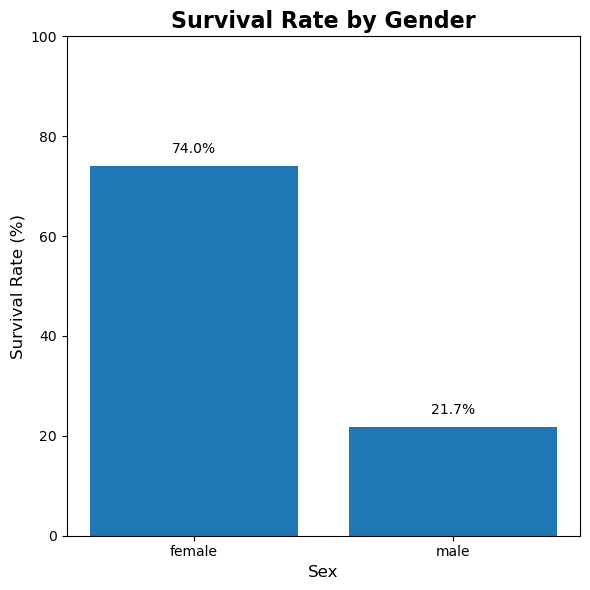

In [63]:
# Run the plot for Sex
plot_survival_by_category(df, 'Sex', 'Survival Rate by Gender')
plt.show()

### Did a passenger's wealth or class affect their survival rate?

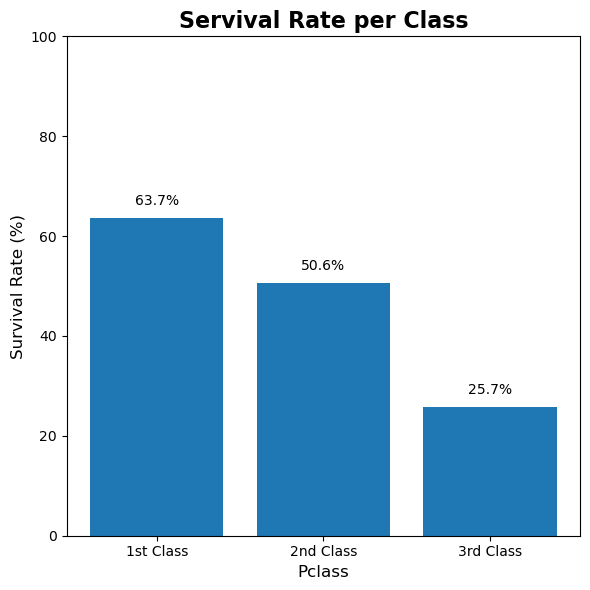

In [65]:
plot_survival_by_category(df, 'Pclass', "Servival Rate per Class")

#### Were certain age groups more likely to survive?

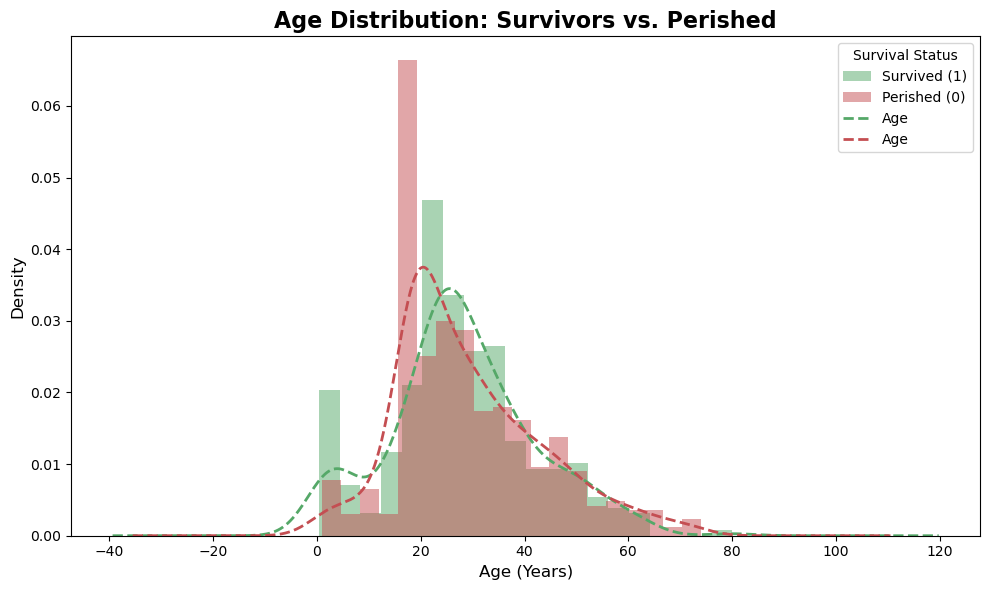

In [68]:
def plot_age_distribution(data):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter data for survivors and non-survivors
    survived = data[data['Survived'] == 1]['Age']
    perished = data[data['Survived'] == 0]['Age']
    
    # Use pandas/matplotlib plotting functions for the histograms and KDE
    ax.hist(survived, bins=20, alpha=0.5, label='Survived (1)', density=True, color='#55a868')
    ax.hist(perished, bins=20, alpha=0.5, label='Perished (0)', density=True, color='#c44e52')
    
    survived.plot(kind='kde', ax=ax, color='#55a868', linestyle='--', linewidth=2)
    perished.plot(kind='kde', ax=ax, color='#c44e52', linestyle='--', linewidth=2)

    ax.set_title('Age Distribution: Survivors vs. Perished', fontsize=16, fontweight='bold')
    ax.set_xlabel('Age (Years)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(title='Survival Status')
    
    plt.tight_layout()

plot_age_distribution(df)
plt.show()

### How much did different classes of passengers pay, and what was the range of prices?

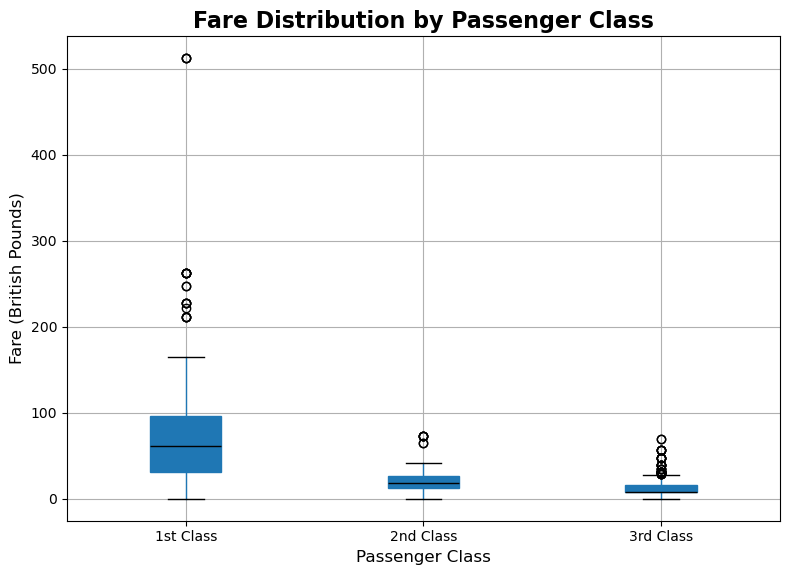

In [70]:
def plot_fare_boxplot(data):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bp = data.boxplot(column='Fare', by='Pclass', ax=ax, 
                      patch_artist=True, medianprops={'color': 'black'})
    
    # Clean up the plot details
    ax.set_title('Fare Distribution by Passenger Class', fontsize=16, fontweight='bold')
    ax.set_xlabel('Passenger Class', fontsize=12)
    ax.set_ylabel('Fare (British Pounds)', fontsize=12)
    plt.suptitle('') # Remove the automatic pandas title/subtitle
    
    plt.tight_layout()

plot_fare_boxplot(df)

### Can we find groups of survivors based on a combination of age and fare?

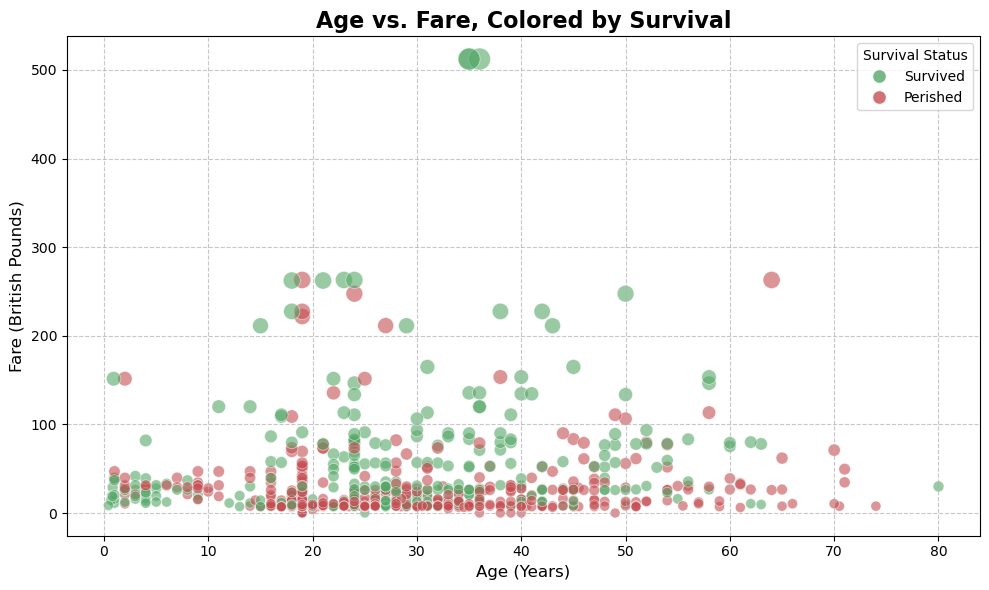

In [72]:
def plot_age_fare_scatter(data):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define colors and sizes based on survival and fare
    colors = data['Survived'].apply(lambda x: '#55a868' if x == 1 else '#c44e52')
    sizes = (data['Fare'] / data['Fare'].max() * 200) + 50 # Normalize fare for size, add min size

    # Matplotlib scatter function
    scatter = ax.scatter(
        x=data['Age'], 
        y=data['Fare'], 
        c=colors, 
        alpha=0.6, 
        s=sizes, 
        edgecolors='w',
        linewidth=0.5
    )
    
    ax.set_title('Age vs. Fare, Colored by Survival', fontsize=16, fontweight='bold')
    ax.set_xlabel('Age (Years)', fontsize=12)
    ax.set_ylabel('Fare (British Pounds)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Create a simplified legend for survival status
    ax.legend(
        handles=[
            plt.Line2D([0], [0], marker='o', color='w', label='Survived', 
                       markerfacecolor='#55a868', markersize=10, alpha=0.8),
            plt.Line2D([0], [0], marker='o', color='w', label='Perished', 
                       markerfacecolor='#c44e52', markersize=10, alpha=0.8)
        ],
        title='Survival Status',
        loc='upper right'
    )

    plt.tight_layout()

plot_age_fare_scatter(df)
plt.show()